### 회 귀

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
from dataprep.eda import plot, plot_correlation, plot_missing

%matplotlib inline

boston=load_boston()
data=pd.DataFrame(boston.data,columns=boston.feature_names)

data['PRICE']=boston.target
data.shape

NumExpr defaulting to 8 threads.


(506, 14)

In [5]:
from dataprep.eda import plot, plot_correlation, plot_missing


In [6]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


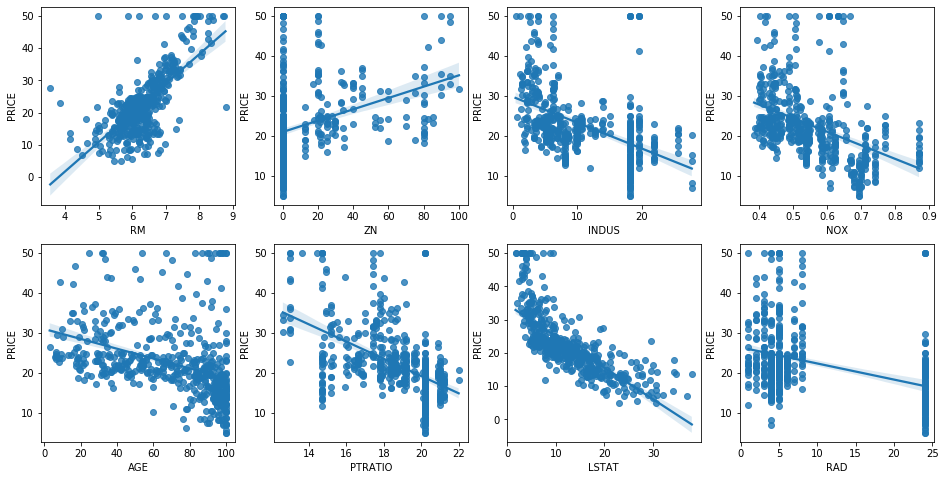

In [8]:
f,ax=plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_features=['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i, feature in enumerate(lm_features):
    row=int(i/4)
    col=i%4
    sns.regplot(x=feature,y='PRICE',data=data,ax=ax[row][col])

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

y_target=data['PRICE']
X_data=data.drop('PRICE',axis=1,inplace=False)

X_train,X_test,y_train,y_test=train_test_split(X_data,y_target,test_size=0.3,random_state=1)

lr=LinearRegression()
lr.fit(X_train,y_train)

y_pred=lr.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(f'mse: {mse}')
print(f'rmse: {rmse}')
print(f'variance_score: {r2_score(y_test,y_pred)}')

mse: 19.83132367206335
rmse: 4.453237437198172
variance_score: 0.7836295385076268


In [10]:
print(f'절편: {lr.intercept_}')
print(f'계수 값: {np.round(lr.coef_,1)}')

절편: 46.39649387182394
계수 값: [ -0.1   0.1   0.1   2.4 -21.5   2.8   0.   -1.5   0.3  -0.   -1.    0.
  -0.6]


In [11]:
coeff=pd.Series(data=np.round(lr.coef_,1),index=X_data.columns)
coeff.sort_values(ascending=False)

RM          2.8
CHAS        2.4
RAD         0.3
INDUS       0.1
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -1.0
DIS        -1.5
NOX       -21.5
dtype: float64

In [12]:
from sklearn.model_selection import cross_val_score

y_target=data['PRICE']
X_data=data.drop('PRICE',axis=1,inplace=False)
lr=LinearRegression()

#cross_val_score
neg_mse_scores=cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores=np.sqrt(-1*neg_mse_scores)
avg_rmse=np.mean(rmse_scores)

#scoring='neg_mean_sqaured_error'로 반환되는 값은 모두 음수다
print(f'5 fold의 개별 neg_mse: {neg_mse_scores}')
print(f'5 fold의 개별 rmse: {rmse_scores}')
print(f'5 fold의 평균 rmse: {avg_rmse}')

5 fold의 개별 neg_mse: [-12.46030057 -26.04862111 -33.07413798 -80.76237112 -33.31360656]
5 fold의 개별 rmse: [3.52991509 5.10378498 5.75101191 8.9867887  5.77179405]
5 fold의 평균 rmse: 5.828658946215809


### 다항회귀와 과대적합/과소적합의 이해

In [13]:
from sklearn.preprocessing import PolynomialFeatures

# 다항식으로 변환할 단항식 생성
X=np.arange(4).reshape(2,2)
print(X,'\n')

# dgree=2인 2차 다항식으로 변환 위해 PolynomialFeatures이용해 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr=poly.transform(X)
print(poly_ftr)

[[0 1]
 [2 3]] 

[[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [14]:
def polynomial_func(X):
    y= 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

X=np.arange(4).reshape(2,2)
print(f'일차 단항식 계수:\n {X}')
y=polynomial_func(X)
print(f'삼차 다항식 결정 값:\n {y}')

일차 단항식 계수:
 [[0 1]
 [2 3]]
삼차 다항식 결정 값:
 [  5 125]


In [15]:
# 3차 다항식 변환
poly_ftr=PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

#linear regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model=LinearRegression()
model.fit(poly_ftr,y)
print(f'계수: {np.round(model.coef_,1)}')
print(model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
계수: [0.  0.2 0.2 0.4 0.5 0.7 0.7 1.1 1.6 2.3]
(10,)


In [16]:
from sklearn.pipeline import Pipeline

In [19]:
def polynomial_func(X):
    y= 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

model=Pipeline([('poly',PolynomialFeatures(degree=3)),
               ('linear',LinearRegression())])

X=np.arange(4).reshape(2,2)
y=polynomial_func(X)

model.fit(X,y)

print('Polynimial 회귀 계수: \n',np.round(model.named_steps['linear'].coef_,2))

Polynimial 회귀 계수: 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


### 사이킷런 홈페이지 다항회귀 문제 예제

In [20]:
def true_fun(X):
    return np.cos(1.5*np.pi*X)

np.random.seed(0)
n_samples=30
X=np.sort(np.random.rand(n_samples))

y=true_fun(X)+np.random.randn(n_samples) *0.1



degree1 회귀 계수는 [-1.61]
degree1mse는 0.40772896250986834

degree4 회귀 계수는 [  0.47 -17.79  23.59  -7.26]
degree4mse는 0.043208749872317556

degree15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08]
degree15mse는 182815433.53618237


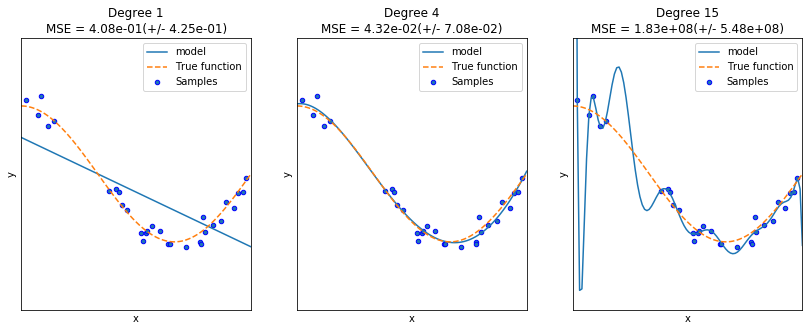

In [31]:
plt.figure(figsize=(14,5))
degrees=[1,4,15]

for i in range(len(degrees)):
    ax=plt.subplot(1,len(degrees),i+1)
    plt.setp(ax,xticks=(),yticks=())
    
    polynomial_features=PolynomialFeatures(degree=degrees[i],include_bias=False)
    linear_regression = LinearRegression()
    pipeline=Pipeline([('poly',polynomial_features),
               ('linear',linear_regression)])
    pipeline.fit(X.reshape(-1,1),y)
    
    #교차검증
    scores=cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
    coefficients = pipeline.named_steps['linear'].coef_
    print(f'\ndegree{degrees[i]} 회귀 계수는 {np.round(coefficients,2)}')
    print(f'degree{degrees[i]}mse는 {-1*np.mean(scores)}')
    
    X_test=np.linspace(0,1,100)
    
    #예측 값 곡선
    plt.plot(X_test,pipeline.predict(X_test[:,np.newaxis]),label='model')
    #실제 값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()